# DSC 148 WI24 Final Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset

In [2]:
df = pd.read_csv("car_prices.csv")
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
df.shape

(60000, 16)

In [4]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [5]:
nan_counts = df.isnull().sum()

print("Number of NaNs in each column:")
print(nan_counts)

Number of NaNs in each column:
year                0
make              254
model             256
trim              454
body             1864
transmission     7303
vin                 0
state               0
condition       11792
odometer           75
color             147
interior          147
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


In [6]:
# Replace NaNs in columns_with_none with 'None'
columns_with_none = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']
df[columns_with_none] = df[columns_with_none].fillna('None')

# Replace NaNs in columns_with_median with the median of each column
columns_with_median = ['condition', 'odometer']
for col in columns_with_median:
    median = df[col].median()
    df[col].fillna(median, inplace=True)

In [7]:
#Convert all columns containing strings to lower case
df = df.map(lambda x: x.lower() if isinstance(x, str) else x)

df = df.map(lambda x: 'coupe' if isinstance(x, str) and 'coupe' in x else x)
df = df.map(lambda x: 'wagon' if isinstance(x, str) and 'wagon' in x else x)
df = df.map(lambda x: 'cab' if isinstance(x, str) and 'cab' in x else x)
df = df.map(lambda x: 'convertible' if isinstance(x, str) and 'convertible' in x else x)
df = df.map(lambda x: 'van' if isinstance(x, str) and 'van' in x else x)
df = df.map(lambda x: 'sedan' if isinstance(x, str) and 'sedan' in x else x)
df = df.map(lambda x: 'coupe' if isinstance(x, str) and 'koup' in x else x)

In [8]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Get unique values for each categorical column
unique_values = {}
for col in categorical_columns:
    unique_values[col] = df[col].unique()

# Print unique values for each categorical column
for col, values in unique_values.items():
    print(f"Unique values in {col}: {values}\n")

Unique values in make: ['kia' 'bmw' 'volvo' 'nissan' 'chevrolet' 'audi' 'ford' 'hyundai' 'buick'
 'cadillac' 'acura' 'lexus' 'infiniti' 'jeep' 'mercedes-benz' 'mitsubishi'
 'mazda' 'mini' 'land rover' 'lincoln' 'jaguar' 'volkswagen' 'toyota'
 'subaru' 'scion' 'porsche' 'none' 'dodge' 'fiat' 'chrysler' 'ferrari'
 'honda' 'gmc' 'ram' 'smart' 'bentley' 'pontiac' 'saturn' 'maserati'
 'mercury' 'hummer' 'landrover' 'mercedes' 'gmc truck' 'saab' 'suzuki'
 'oldsmobile' 'isuzu' 'dodge tk' 'geo' 'rolls-royce' 'mazda tk'
 'hyundai tk' 'mercedes-b' 'vw' 'daewoo' 'chev truck' 'ford tk' 'plymouth'
 'ford truck' 'tesla' 'airstream' 'dot']

Unique values in model: ['sorento' '3 series' 's60' 'coupe' 'altima' 'm5' 'cruze' 'a4' 'camaro'
 'a6' 'optima' 'fusion' 'sonata' 'q5' '6 series' 'impala' '5 series' 'a3'
 'xc70' 'x5' 'sq5' 's5' 'verano' 'suburban' 'elr' 'v60' 'x6' 'ilx' 'k900'
 'malibu' 'rx 350' 'versa' 'elantra' 'versa note' 'a8' 'x1' 'none'
 'enclave' 'tts' '4 series' 'silverado 2500hd' 'mdx' 's

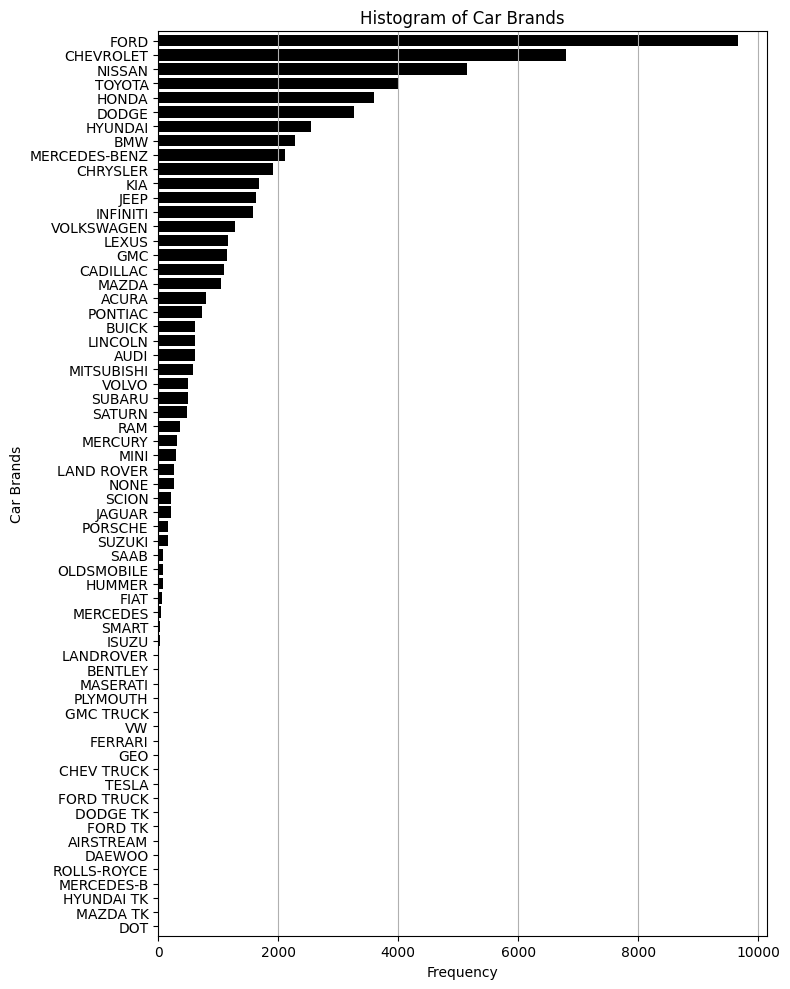

In [9]:
brand_counts = df['make'].str.upper().value_counts()

# Plotting histogram horizontally with wider spacing between bars
plt.figure(figsize=(8, 10))  # Adjust figure size as needed
brand_counts.sort_values().plot(kind='barh', color='black', width=0.8)  # Adjust width as needed
plt.title('Histogram of Car Brands')
plt.ylabel('Car Brands')
plt.xlabel('Frequency')
plt.grid(axis='x')  # Adding grid lines along x-axis for better readability
plt.tight_layout()
plt.show()

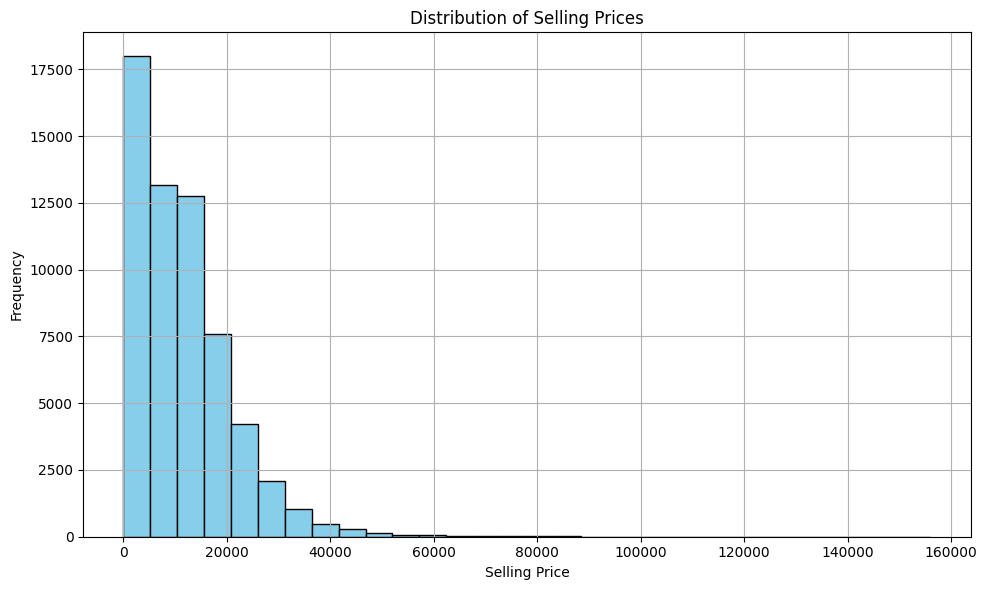

In [10]:
selling_prices = df['sellingprice']

# Plotting histogram
plt.figure(figsize=(10,6))
plt.hist(selling_prices, bins=30, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(True)  # Adding grid lines for better readability
plt.tight_layout()
plt.show()

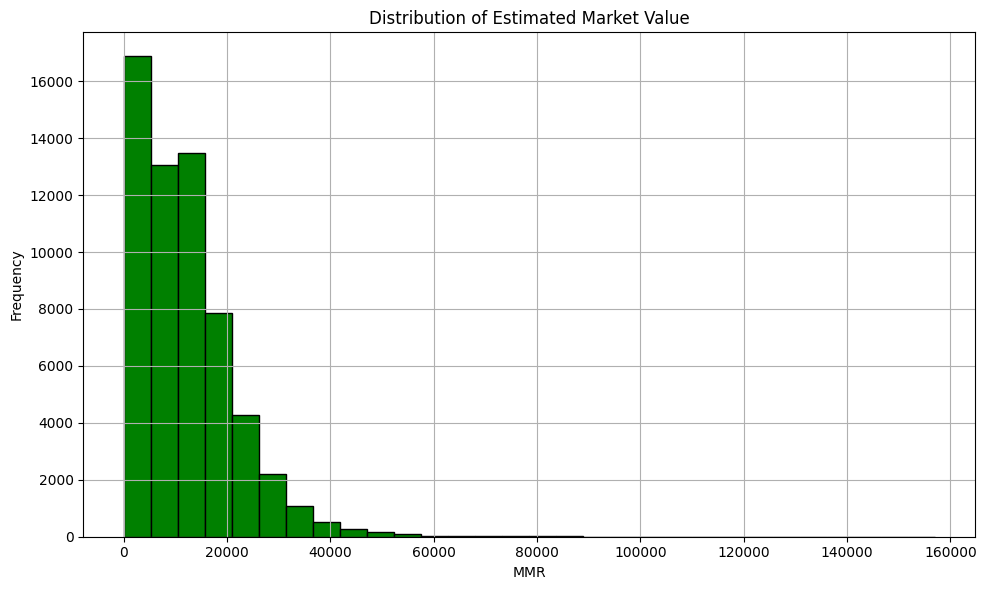

In [11]:
mmr = df['mmr']

# Plotting histogram
plt.figure(figsize=(10,6))
plt.hist(mmr, bins=30, color='green', edgecolor='black') 
plt.title('Distribution of Estimated Market Value')
plt.xlabel('MMR')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

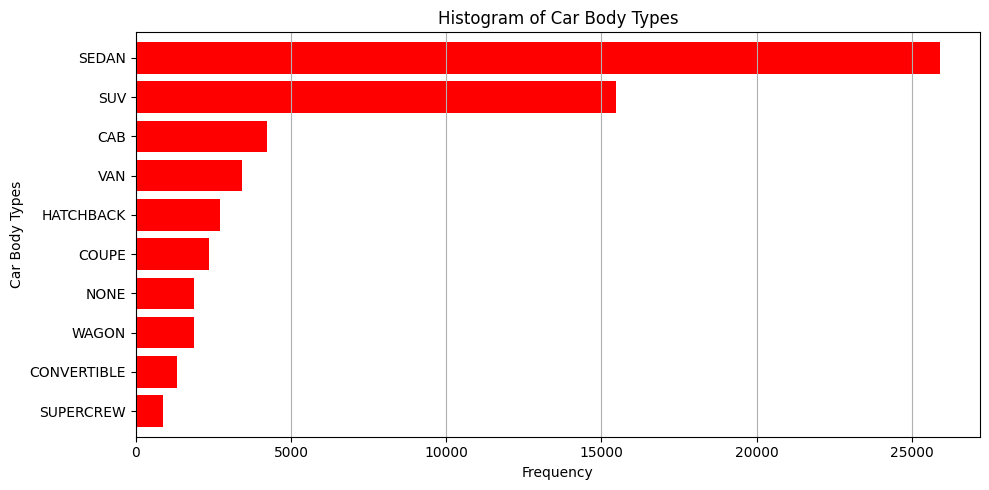

In [12]:
brand_counts = df['body'].str.upper().value_counts()

# Plotting histogram horizontally with wider spacing between bars
plt.figure(figsize=(10, 5))  # Adjust figure size as needed
brand_counts.sort_values().plot(kind='barh', color='red', width=0.8)  # Adjust width as needed
plt.title('Histogram of Car Body Types')
plt.ylabel('Car Body Types')
plt.xlabel('Frequency')
plt.grid(axis='x')  # Adding grid lines along x-axis for better readability
plt.tight_layout()
plt.show()

## Preprocessing

In [13]:
# Sample time format
df.iloc[123]['saledate'].split(' ')

['thu', 'dec', '18', '2014', '12:30:00', 'gmt-0800', '(pst)']

In [14]:
month_dict = {'jan': -0.5, 'feb': -0.4, 'mar': -0.3, 'apr': -0.2, 'may': -0.1, 'jun': 0.0,
             'jul': 0.1, 'aug': 0.2, 'sep': 0.3, 'oct': 0.4, 'nov': 0.5, 'dec': 0.6}

def date_to_num(date):
    date = date.split(' ')
    return int(date[3]) + month_dict[date[1]]

df['saledate'] = df['saledate'].apply(date_to_num)
df['years_aged'] = df['saledate'] - df['year']
df.drop('saledate', axis=1, inplace=True)
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,years_aged
0,2015,kia,sorento,lx,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,-0.4
1,2015,kia,sorento,lx,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,-0.4
2,2014,bmw,3 series,328i sulev,sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,0.5
3,2015,volvo,s60,t5,sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,-0.5
4,2014,bmw,coupe,650i,sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,0.6


In [15]:
# VIN is not needed
df.drop('vin', axis=1, inplace=True)
df.drop('seller', axis=1, inplace=True)
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,years_aged
0,2015,kia,sorento,lx,suv,automatic,ca,5.0,16639.0,white,black,20500.0,21500.0,-0.4
1,2015,kia,sorento,lx,suv,automatic,ca,5.0,9393.0,white,beige,20800.0,21500.0,-0.4
2,2014,bmw,3 series,328i sulev,sedan,automatic,ca,45.0,1331.0,gray,black,31900.0,30000.0,0.5
3,2015,volvo,s60,t5,sedan,automatic,ca,41.0,14282.0,white,black,27500.0,27750.0,-0.5
4,2014,bmw,coupe,650i,sedan,automatic,ca,43.0,2641.0,gray,black,66000.0,67000.0,0.6


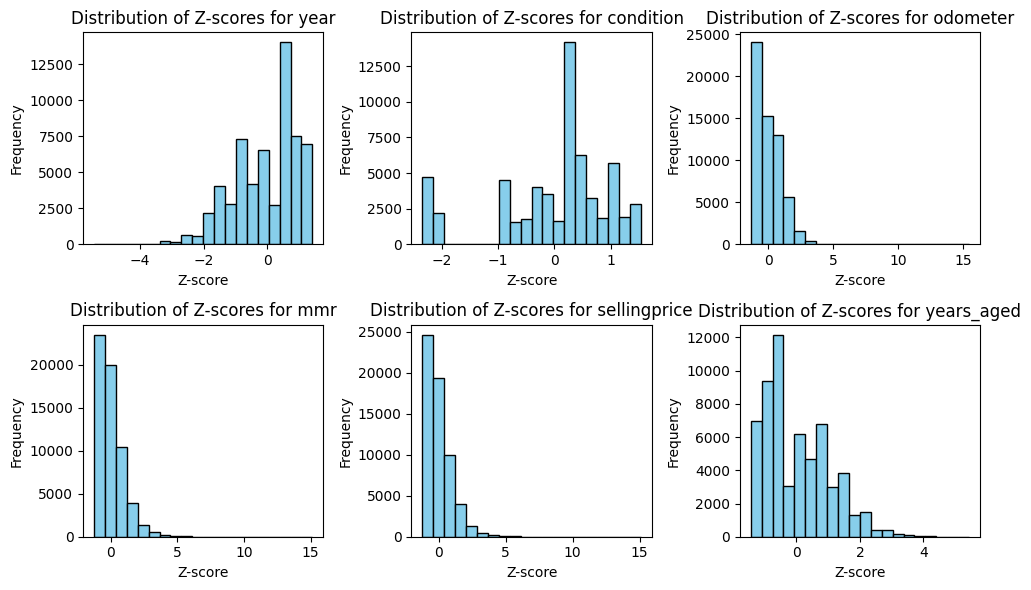

In [16]:
from scipy import stats

# Select only the numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Calculate Z-scores for numerical columns
z_scores = stats.zscore(df[numerical_columns])

# Plot the distribution of Z-scores for each numerical column
plt.figure(figsize=(10, 6))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, len(numerical_columns)//2, i+1)
    plt.hist(z_scores[z_scores.columns[i]], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Z-scores for {col}')
    plt.xlabel('Z-score')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [17]:
# Define a threshold for the absolute Z-score value
threshold = 2
 
# Find outliers based on the absolute Z-score
outliers = (abs(z_scores) > threshold).any(axis=1)

# Remove outliers from the DataFrame
df = df[~outliers]
df.shape

(47472, 14)

In [18]:
X = df.drop('sellingprice', axis=1)
y = df['sellingprice']

In [19]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

categorical_columns = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior']
numerical_columns = ['year', 'condition', 'odometer', 'mmr', 'years_aged']

# One-hot encoding for each categorical column
encoded_dfs = []
for col in categorical_columns:
    encoder = OneHotEncoder(sparse_output=False)
    encoded_col = encoder.fit_transform(X[[col]])
    encoded_df = pd.DataFrame(encoded_col, columns=encoder.get_feature_names_out([col]))
    encoded_dfs.append(encoded_df)

# Standard scaling for each numerical column
scaled_dfs = []
for col in numerical_columns:
    scaler = MinMaxScaler()
    scaled_col = scaler.fit_transform(X[[col]])
    scaled_df = pd.DataFrame(scaled_col, columns=[col])
    scaled_dfs.append(scaled_df)

# Concatenate the encoded and scaled DataFrames
X_xgb = pd.concat(encoded_dfs + scaled_dfs, axis=1)
X_xgb.head()

,make_acura,make_audi,make_bmw,make_buick,make_cadillac,make_chevrolet,make_chrysler,make_daewoo,make_dodge,make_fiat,...,interior_silver,interior_tan,interior_white,interior_yellow,interior_—,year,condition,odometer,mmr,years_aged
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.789474,0.071569,0.883871,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.000000,0.973684,0.010188,0.485484,0.007042
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.928571,0.578947,0.078605,0.445161,0.077465
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.000000,0.578947,0.041645,0.487097,0.007042
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.928571,0.157895,0.067354,0.569355,0.077465


In [20]:
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior']
numerical_columns = ['year', 'condition', 'odometer', 'mmr', 'years_aged']

# Ordinal encoding for each categorical column
encoded_dfs = []
for col in categorical_columns:
    encoder = OrdinalEncoder()
    encoded_col = encoder.fit_transform(X[[col]])
    encoded_df = pd.DataFrame(encoded_col, columns=[col])
    encoded_dfs.append(encoded_df)

# Standard scaling for each numerical column
scaled_dfs = []
for col in numerical_columns:
    scaler = MinMaxScaler()
    scaled_col = scaler.fit_transform(X[[col]])
    scaled_df = pd.DataFrame(scaled_col, columns=[col])
    scaled_dfs.append(scaled_df)

# Concatenate the encoded and scaled DataFrames
X_rf = pd.concat(encoded_dfs + scaled_dfs, axis=1)
X_rf.head()

,make,model,trim,body,transmission,state,color,interior,year,condition,odometer,mmr,years_aged
0,49.0,462.0,945.0,5.0,0.0,2.0,18.0,1.0,1.000000,0.789474,0.071569,0.883871,0.000000
1,21.0,376.0,678.0,5.0,0.0,2.0,15.0,14.0,1.000000,0.973684,0.010188,0.485484,0.007042
2,5.0,135.0,116.0,5.0,0.0,2.0,2.0,1.0,0.928571,0.578947,0.078605,0.445161,0.077465
3,15.0,500.0,816.0,5.0,0.0,2.0,15.0,17.0,1.000000,0.578947,0.041645,0.487097,0.007042
4,5.0,88.0,648.0,2.0,0.0,2.0,1.0,1.0,0.928571,0.157895,0.067354,0.569355,0.077465


## Model

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END learning_rate=0.15, max_depth=4, n_estimators=100, reg_alpha=1.0, reg_lambda=0.5;, score=-1952779.185 total time=   7.2s
[CV 2/3] END learning_rate=0.15, max_depth=4, n_estimators=100, reg_alpha=1.0, reg_lambda=0.5;, score=-2068503.846 total time=   7.2s
[CV 3/3] END learning_rate=0.15, max_depth=4, n_estimators=100, reg_alpha=1.0, reg_lambda=0.5;, score=-2009812.159 total time=   7.4s
Best Parameters: {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 100, 'reg_alpha': 1.0, 'reg_lambda': 0.5}
Root Mean Squared Error: 1396.668513915326


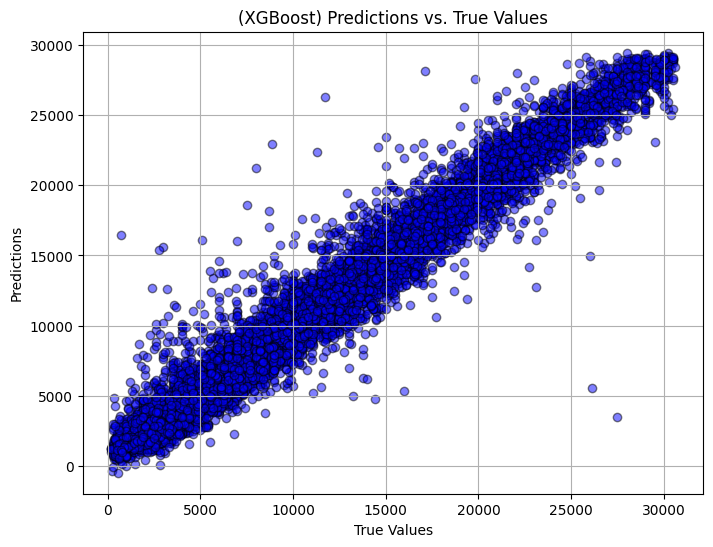

Root Mean Squared Error(Directly using MMR):  13190.773167766341


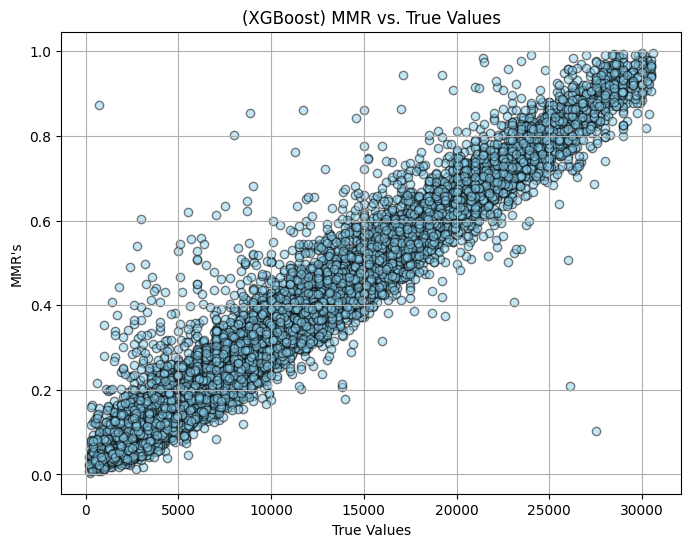

In [21]:
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_xgb, y, test_size=0.3, random_state=42)

"""
# Define the parameter grid
param_grid = {
    'learning_rate': [0.15, 0.5],
    'max_depth': [4, 15],
    'n_estimators': [50, 100],
    'reg_alpha': [0.5, 1.0],
    'reg_lambda': [0.1, 0.5]
}
"""

# Directly use the optimal parameters for quick computation
param_grid = {
    'learning_rate': [0.15],
    'max_depth': [4],
    'n_estimators': [100],
    'reg_alpha': [1.0],
    'reg_lambda': [0.5]
}

# Initialize the XGBoost regressor
xgb = XGBRegressor(eval_metric='rmse', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=3)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Best parameters found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for predictions
best_model = grid_search.best_estimator_
pred_xgb = best_model.predict(X_test)

# Calculating RMSE
rmse = mean_squared_error(y_test, pred_xgb, squared=False)
print("Root Mean Squared Error:", rmse)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_xgb, color='blue', alpha=0.5, edgecolors='black')
plt.title('(XGBoost) Predictions vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

rmse = mean_squared_error(y_test, X_test['mmr'], squared=False)
print("Root Mean Squared Error(Directly using MMR): ", rmse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, X_test['mmr'], color='skyblue', alpha=0.5, edgecolors='black')
plt.title('(XGBoost) MMR vs. True Values')
plt.xlabel('True Values')
plt.ylabel('MMR\'s')
plt.grid(True)
plt.show()

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 100}
Random Forest Root Mean Squared Error: 1433.9850168427702


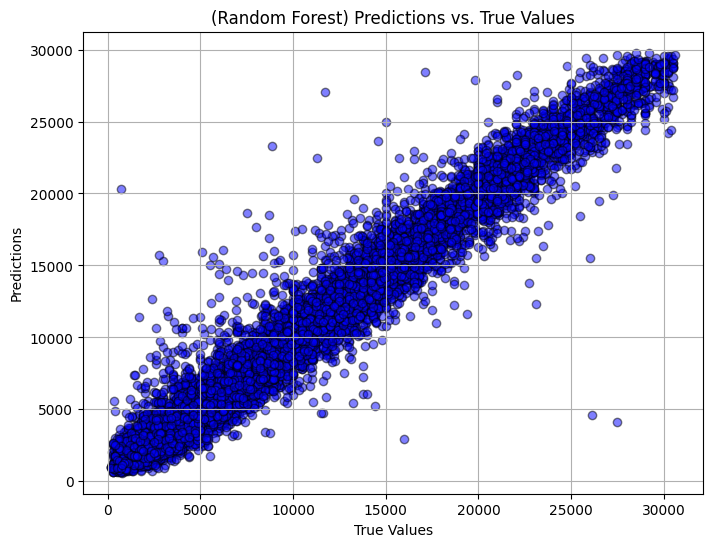

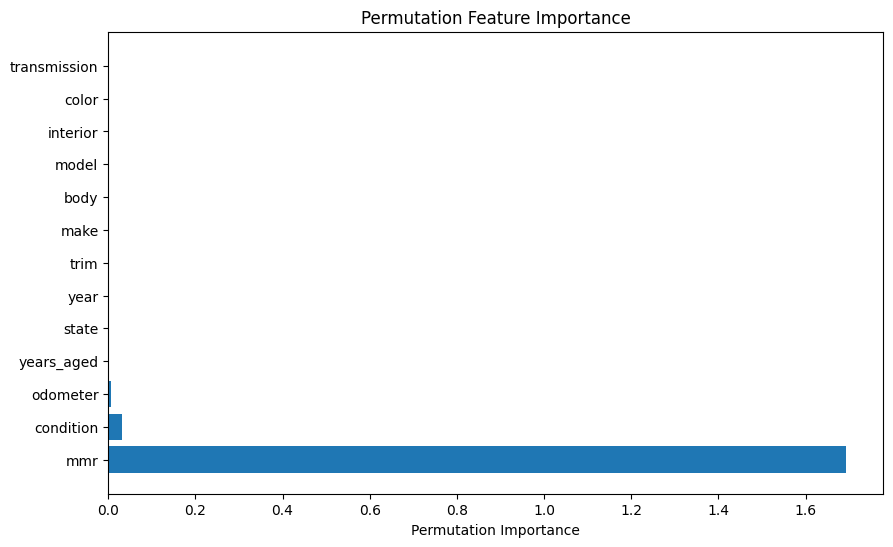

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rf, y, test_size=0.3, random_state=42)

"""
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [30, 40, 50],
    'min_samples_split': [8, 12],
    'min_samples_leaf': [4, 5]
}
"""

# Directly use the optimal parameters for quick computation
rf_param_grid = {
    'n_estimators': [100],
    'max_depth': [30],
    'min_samples_split': [12],
    'min_samples_leaf': [4]
}

rf_model = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='neg_mean_squared_error', verbose=3, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

best_rf_params = rf_grid_search.best_params_
print("Best Parameters:", best_rf_params)

best_rf_model = rf_grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

pred_rf = best_rf_model.predict(X_test)
rmse_rf = mean_squared_error(y_test, pred_rf, squared=False)
print(f'Random Forest Root Mean Squared Error: {rmse_rf}')

plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_rf, color='blue', alpha=0.5, edgecolors='black')
plt.title('(Random Forest) Predictions vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

# Calculate permutation feature importance
perm_importance = permutation_importance(best_rf_model, X_test, y_test, n_repeats=10, random_state=42)

# Rank features based on importance scores
sorted_indices = perm_importance.importances_mean.argsort()[::-1]

# Extract feature names and importances
feature_names = X_test.columns[sorted_indices]
importances = perm_importance.importances_mean[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), feature_names)
plt.xlabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.show()